In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("carprices.csv")
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


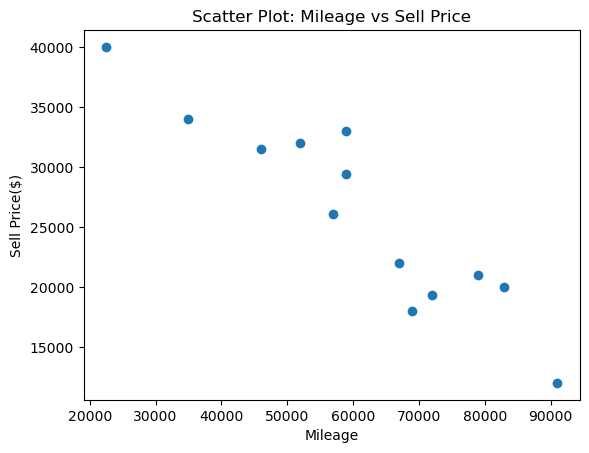

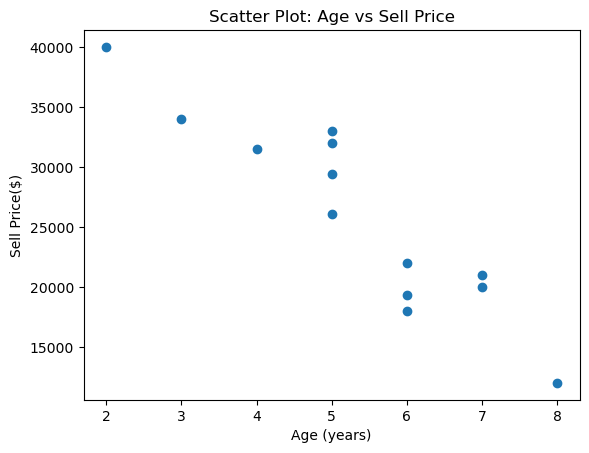

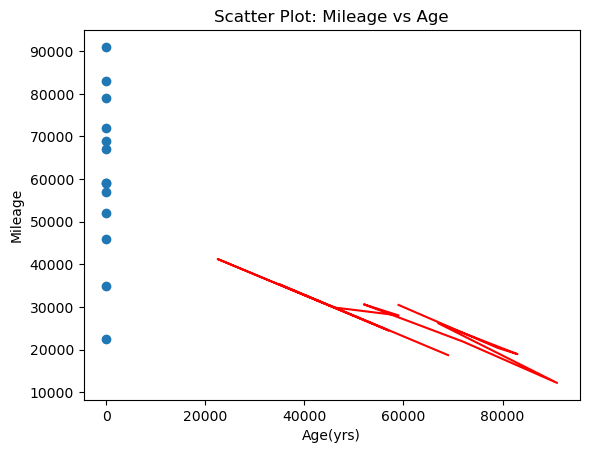

In [39]:
#Plot the data
%matplotlib inline

# Create a scatter plot for Mileage vs Sell Price
plt.scatter(df['Mileage'], df['Sell Price($)'])
plt.xlabel('Mileage')
plt.ylabel('Sell Price($)')
plt.title('Scatter Plot: Mileage vs Sell Price')
plt.show()

# Create a scatter plot for Age vs Sell Price
plt.scatter(df['Age(yrs)'], df['Sell Price($)'])
plt.xlabel('Age (years)')
plt.ylabel('Sell Price($)')
plt.title('Scatter Plot: Age vs Sell Price')
plt.show()

# Create a scatter plot for Mileage vs Age
plt.scatter(df['Age(yrs)'], df['Mileage'])
plt.plot(df['Mileage'], y_pred, color='red', label='Linear Regression Line')
plt.xlabel('Age(yrs)')
plt.ylabel('Mileage')
plt.title('Scatter Plot: Mileage vs Age')
plt.show()

In [8]:
dummies = pd.get_dummies(df['Car Model'])
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [9]:
merged = pd.concat([df, dummies], axis='columns')
merged

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [11]:
final = merged.drop(['Car Model', 'Mercedez Benz C class'],axis='columns')
final

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [30]:
test_X = final.drop('Sell Price($)', axis='columns')
test_y = final['Sell Price($)']
model = LinearRegression()
model.fit(test_X, test_y)

LinearRegression()

In [17]:
# Mileage = 4500, Age = 4, Mercedez Benz C Class
model.predict([[45000,4,0,0]])

C:\Users\JjayFabor\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

In [19]:
# Mileage = 86000, Age = 7, BMW X5
model.predict([[86000,7,0,1]])

C:\Users\JjayFabor\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])

In [32]:
model.score(test_X, test_y)

0.9417050937281082

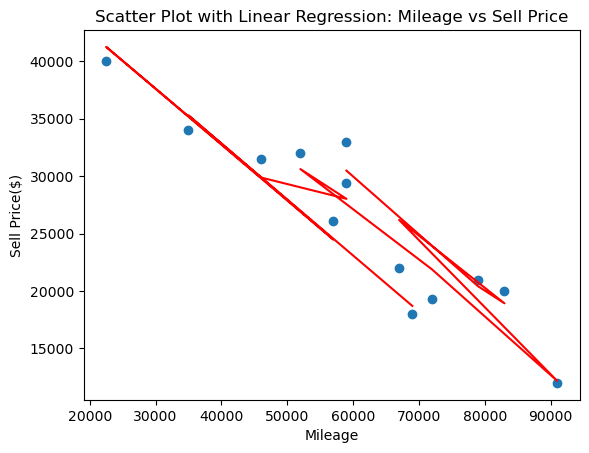

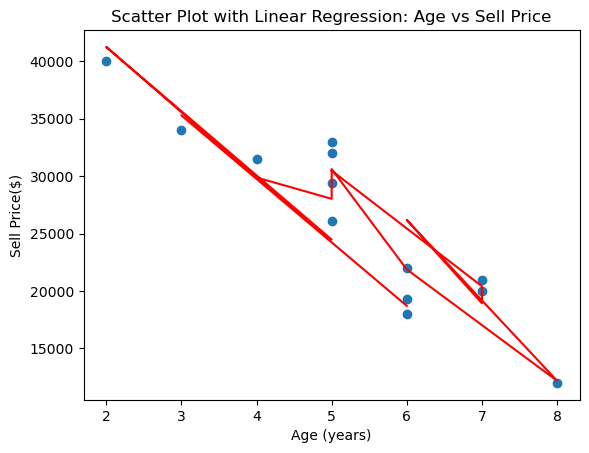

In [35]:
y_pred = model.predict(test_X)

# Create a scatter plot for Mileage vs Sell Price and add the linear regression line
plt.scatter(df['Mileage'], df['Sell Price($)'], label='Original Data')
plt.plot(df['Mileage'], y_pred, color='red', label='Linear Regression Line')
plt.xlabel('Mileage')
plt.ylabel('Sell Price($)')
plt.title('Scatter Plot with Linear Regression: Mileage vs Sell Price')
plt.show()

# Create a scatter plot for Age vs Sell Price and add the linear regression line
plt.scatter(df['Age(yrs)'], df['Sell Price($)'], label='Original Data')
plt.plot(df['Age(yrs)'], y_pred, color='red', label='Linear Regression Line')
plt.xlabel('Age (years)')
plt.ylabel('Sell Price($)')
plt.title('Scatter Plot with Linear Regression: Age vs Sell Price')
plt.show()

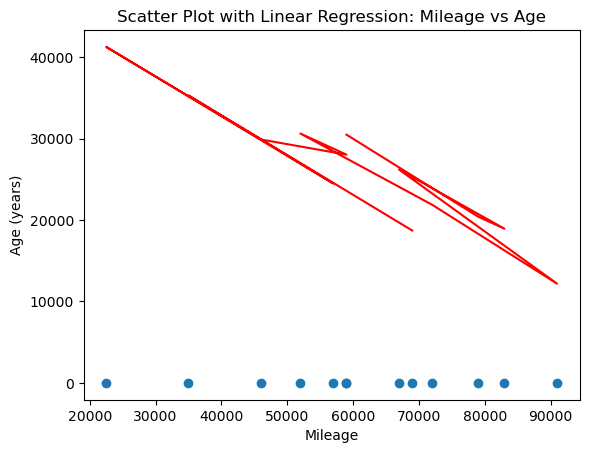

In [36]:
# Create a scatter plot for Mileage vs Age and add the linear regression line
plt.scatter(df['Mileage'], df['Age(yrs)'], label='Original Data')
plt.plot(df['Mileage'], y_pred, color='red', label='Linear Regression Line')
plt.xlabel('Mileage')
plt.ylabel('Age (years)')
plt.title('Scatter Plot with Linear Regression: Mileage vs Age')
plt.show()
